In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
tf.__version__

'2.3.0'

In [4]:
tf.keras.__version__

'2.4.0'

## 데이터 적재

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape, train_labels.shape


((60000, 28, 28), (60000,))

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

## 데이터 시각화

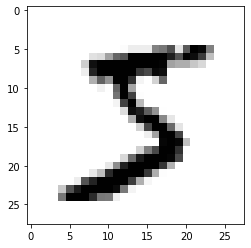

In [9]:
plt.imshow(train_images[0], cmap='binary')

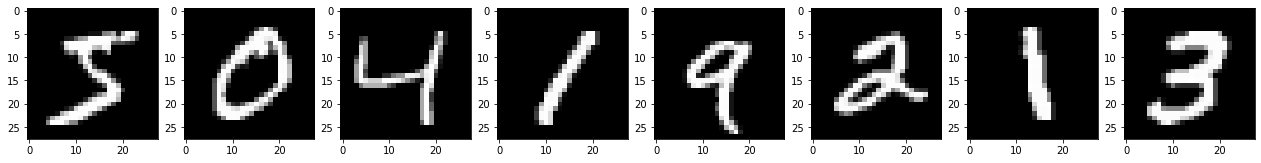

In [10]:
fig, ax = plt.subplots(figsize=(22,6), nrows=1, ncols=8)

for i in range(8):
    ax[i].imshow(train_images[i], cmap='gray')

In [11]:
train_labels[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

## 데이터 전처리

### 첫번째 이미지 정규화 시켜준다 => /255로 픽셀을 나눠준다

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
train_images[0].shape

(28, 28)

In [14]:
# 픽셀값 / 255로 나눠준다 => 정규화
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels= np.array(test_labels, dtype=np.float32)

In [15]:
# one -hot -encoding

train_labels_ohe = to_categorical(train_labels)
test_labels_ohe = to_categorical(test_labels)

## 모델 생성

In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(50, activation='sigmoid'), 
    Dense(10, activation='softmax')
])

In [18]:
# 모델확인 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [19]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(50, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [21]:
from tensorflow.keras.optimizers import SGD

In [22]:
# model.compile(optimizer, loss, metrics)

model.compile(optimizer= SGD(learning_rate=0.1), 
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 모델 학습

In [26]:
history = model.fit(x=train_images, y=train_labels_ohe, validation_split= 0.2,
         batch_size=100, epochs=17, verbose=1)

Epoch 1/17
480/480 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.9461 - val_loss: 0.1881 - val_accuracy: 0.9477
Epoch 2/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1841 - accuracy: 0.9468 - val_loss: 0.1840 - val_accuracy: 0.9477
Epoch 3/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1793 - accuracy: 0.9486 - val_loss: 0.1805 - val_accuracy: 0.9492
Epoch 4/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1750 - accuracy: 0.9497 - val_loss: 0.1772 - val_accuracy: 0.9498
Epoch 5/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1706 - accuracy: 0.9510 - val_loss: 0.1748 - val_accuracy: 0.9507
Epoch 6/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1667 - accuracy: 0.9524 - val_loss: 0.1715 - val_accuracy: 0.9508
Epoch 7/17
480/480 [==============================] - 1s 1ms/step - loss: 0.1630 - accuracy: 0.9532 - val_loss: 0.1682 - val_accuracy: 0.9522
Epoch 

In [27]:
history.history['loss']

[0.1890893578529358,
 0.18412674963474274,
 0.17930226027965546,
 0.17497192323207855,
 0.17064641416072845,
 0.16669020056724548,
 0.16299501061439514,
 0.15931636095046997,
 0.15580010414123535,
 0.15261892974376678,
 0.14937801659107208,
 0.14648112654685974,
 0.1436508297920227,
 0.14091557264328003,
 0.1382758766412735,
 0.13576103746891022,
 0.13332810997962952]

In [28]:
history.history['accuracy']

[0.9460625052452087,
 0.9467708468437195,
 0.948562502861023,
 0.9496874809265137,
 0.9509791731834412,
 0.9524166584014893,
 0.953249990940094,
 0.9542083144187927,
 0.9557708501815796,
 0.956291675567627,
 0.9571041464805603,
 0.9584375023841858,
 0.9593124985694885,
 0.9599791765213013,
 0.960854172706604,
 0.9616666436195374,
 0.9622291922569275]

## 시험데이터로 예측 

In [29]:
model.evaluate(test_images, test_labels_ohe, batch_size=100)

100/100 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.9581


[0.14533871412277222, 0.9581000208854675]

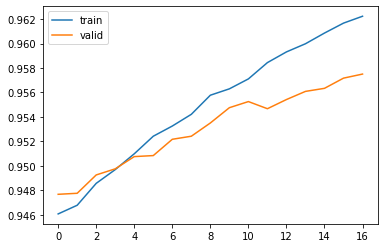

In [33]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [41]:
predict_prob = model.predict(test_images)

In [42]:
predict_prob.shape

(10000, 10)

In [43]:
predict_prob[0]

array([7.5155593e-05, 1.3096222e-06, 8.5642200e-04, 1.7687002e-03,
       1.5384701e-06, 1.1103760e-04, 1.8954029e-08, 9.9675202e-01,
       1.2066307e-05, 4.2171596e-04], dtype=float32)

In [37]:
test_image0_predict = model.predict(np.reshape(test_images[0], (-1, 28,28)))

In [38]:
test_image0_predict

array([[7.5155520e-05, 1.3096222e-06, 8.5642200e-04, 1.7687002e-03,
        1.5384701e-06, 1.1103760e-04, 1.8954029e-08, 9.9675202e-01,
        1.2066318e-05, 4.2171596e-04]], dtype=float32)

In [39]:
np.reshape(test_images[0], (-1,28,28)).shape

(1, 28, 28)

In [ ]:
# 차원 팽창 np.expand_dims